# Goal:
Build a model to predict whether a person is at risk of heart disease based on their health data

# Task 3: Heart Disease Prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

###Dataset

In [ ]:
# dataset used : " https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset "

In [ ]:
# data reading

df = pd.read_csv('/content/heartdisease.zip')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# age
age in years


sex
(1 = male; 0 = female)


cp
chest pain type


trestbps
resting blood pressure (in mm Hg on admission to the hospital)


chol
serum cholestoral in mg/dl


fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)


restecg
resting electrocardiographic results


thalach
maximum heart rate achieved


exang
exercise induced angina (1 = yes; 0 = no)


oldpeak

## EDA

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


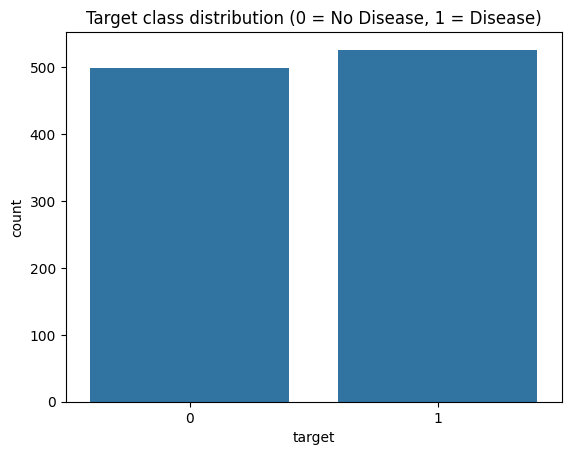

In [ ]:
# visualizing target feature

sns.countplot( x='target' , data=df )
plt.title("Target class distribution (0 = No Disease, 1 = Disease)"  )
plt.show()

<Axes: xlabel='sex', ylabel='count'>

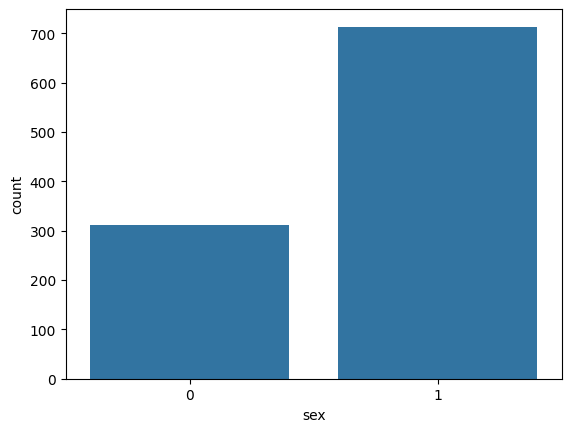

In [ ]:
sns.countplot(x='sex' , data=df)

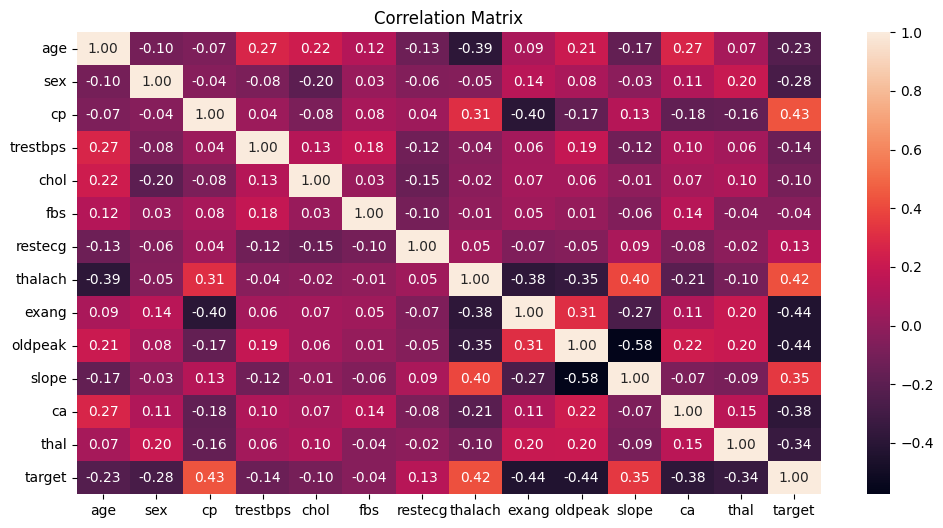

In [ ]:
# showing columns correlation with heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr() , annot=True , fmt=".2f" )
plt.title("Correlation Matrix")
plt.show()

##  Split the Data

In [ ]:
X=df.drop( columns=['target'])
y=df['target']

In [ ]:
X_train ,X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

## Training Model

In [ ]:
model =LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=model.predict(X_test)

## Evaluate the model

In [ ]:
# Accuracy of the model

print("Accuracy Score:",accuracy_score(y_test, y_pred)*100)


Accuracy Score: 79.51219512195122


In [ ]:
# confusion metrix

confusion_matrix(y_test, y_pred)

array([[73, 29],
       [13, 90]])

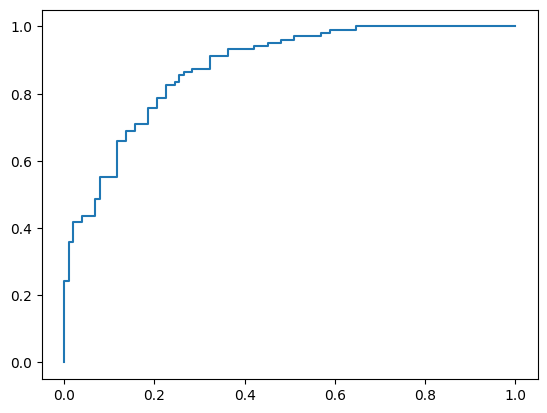

In [ ]:
# ROC Curve

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='ROC curve')

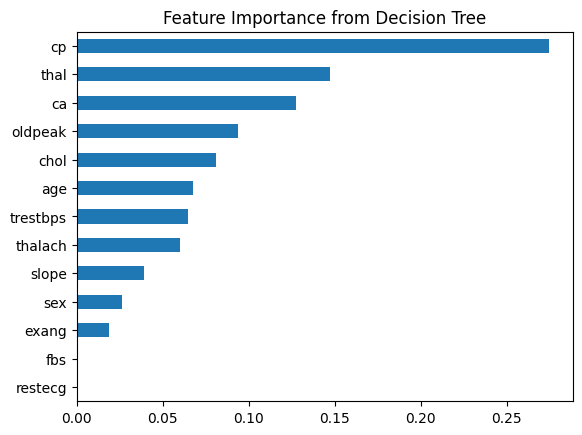

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
# showing how much the column matters for model durig prediction

feature_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance from Decision Tree")
plt.show()


In [ ]:
y_tr=tree_model.predict(X_test)

In [ ]:
print("Accuracy Score For Decision Tree :","{:.2f}".format(accuracy_score(y_test, y_tr)*100))

Accuracy Score For Decision Tree : 98.54


so the decision tree classifier shows best results with 98% accuracy